# Human Resource Department : Checking for employee attrition

## Steps:
1. Importing libraries
2. Importing and exploring the data set
3. Perform Exploratory data Analysis (EDA)
     ->This includes performing a correlation matrix, histogram for various columns, measuring attrition to various factors.
4. Cleaning the data
     #Includes onehotencoding the categorical variables and scaling the data.
5. Split train and test set.
6. Perform logistic Regression
7. Use the Random forest classifier
8. Create an Artificial neural network and build a classifier.
9. Compare the models with accuracy, precision, recall and F-1 score.

## Importing the necessary libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and reading the data

In [110]:
# Reading the .csv file and storing it in a variable
data = pd.read_csv('Human_Resources.csv')

In [111]:
pd.set_option('display.max_columns',None)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [113]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

## Exploratory data analysis

In [114]:
# Converting Attrition, Over18 and OverTime to numerical variables
data['Attrition'] = data['Attrition'].map({'No':0, 'Yes':1})
data['Over18'] = data['Over18'].map({'N':0, 'Y':1})
data['OverTime'] = data['OverTime'].map({'No':0, 'Yes':1})
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0        19479                   8       1         1                 11   
1        24907                   1       1         0                 23   
2         2396                   6       1         1                 15   
3        23159                   1       1         1                 11   
4        16632                   9       1         0                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

<AxesSubplot:>

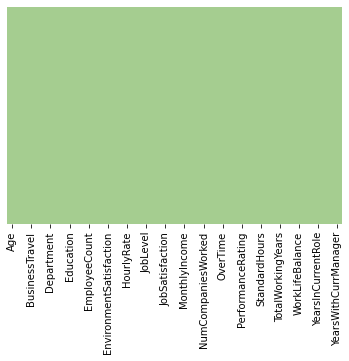

In [115]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="crest")

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

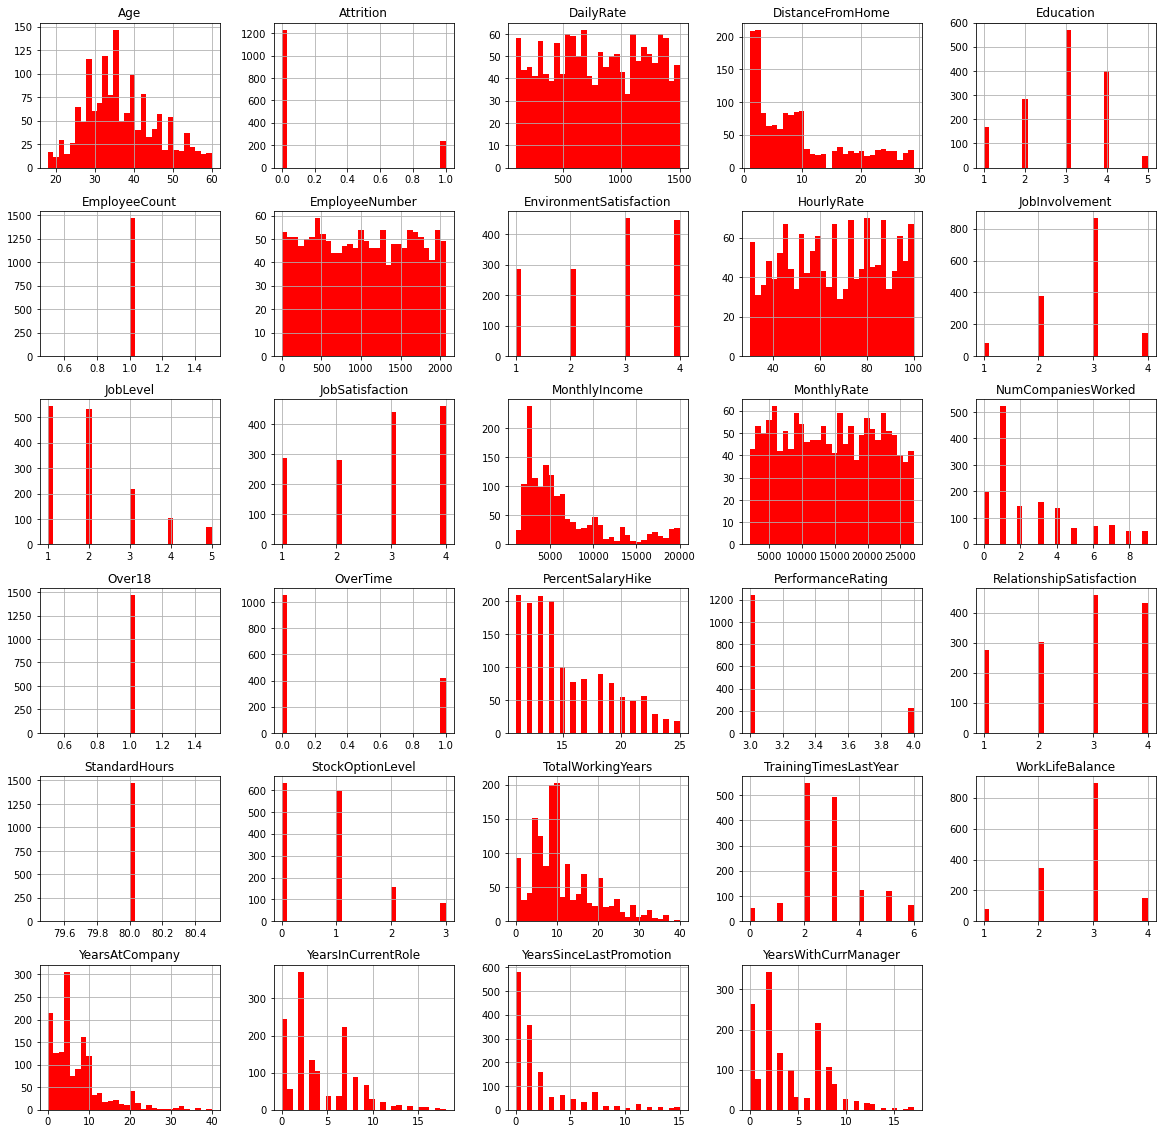

In [72]:
# Histogram for checking data vs amount in numerical variables
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [73]:
# Drop employee count, over18, standard hours
data = data.drop(['EmployeeCount', 'Over18','StandardHours'],axis=1)

In [74]:
# Employee number is irrelevent
data = data.drop(['EmployeeNumber'],axis=1)

In [75]:
len(data)

1470

In [76]:
# Finding number of employees who stayed
print("Number of employees who stayed :" + str(len(data[data['Attrition'] == 0])))

Number of employees who stayed :1233


In [77]:
#Counting number of employees who left
print("Number of employees who left :" + str(len(data[data['Attrition'] == 1])))

Number of employees who left :237


In [78]:
left = data[data['Attrition'] == 1]
stayed = data[data['Attrition'] == 0]

<AxesSubplot:>

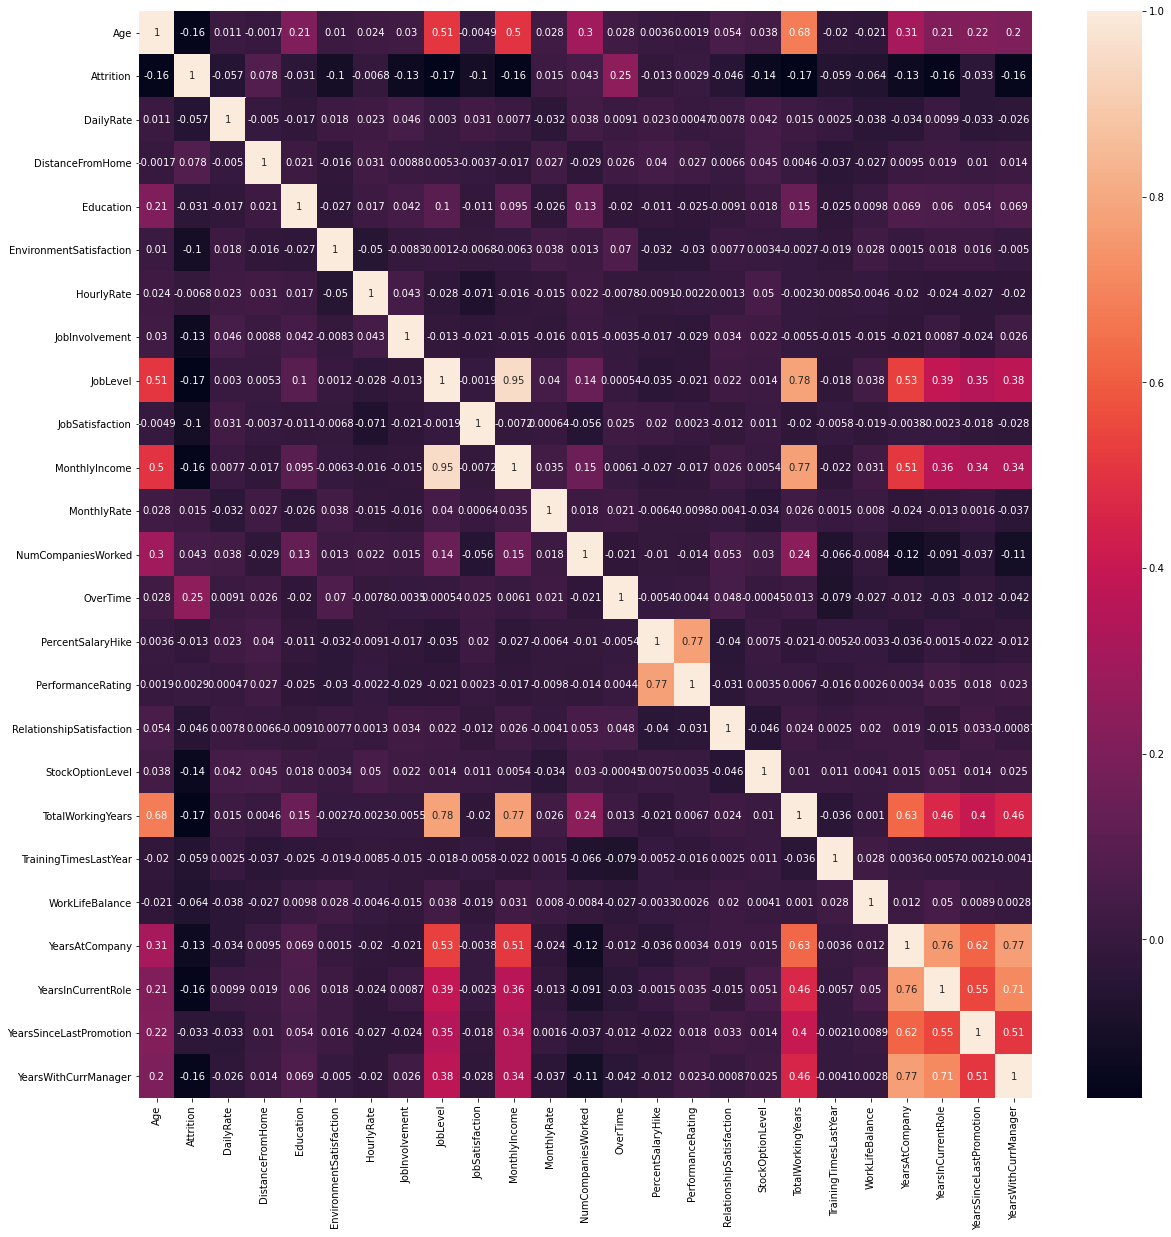

In [79]:
# Checking correlation
correlations = data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [80]:
left.describe()

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       237.000000     237.000000    237.000000          237.000000   
mean          2.468354    4787.092827  14559.308017            2.940928   
std           1.118058    3640.210367   7208.153264            2.678519   
min           1.000000    1009.000000   2326.000000            0.000000   
25%           1.000000    2373.000000   8870.000000            1.000000   
50%           3.000000    3202.000000  14618.000000            1.000000   
75%           3.000000    5916.000000  21081.000000            5.000000   
max           4.000000   19859.000000  26999.000000            9.000000   

         OverTime  PercentSalaryHike  PerformanceRating  \
count  237.000000         237.000000         237.000000   
mean     0.535865          15.097046           3.156118   
std      0.499768           3.770294           0.363735   
min      0.000000          11.000000           3.000000   
25%      0.000000          12.000000           3.000000   
50%      1.000000          14.000000           3.000000   
75%      1.000000          17.000000           3.000000   
max      1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                237.000000        237.000000         237.000000   
mean                   2.599156          0.527426           8.244726   
std                    1.125437          0.856361           7.169204   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           3.000000   
50%                    3.000000          0.000000           7.000000   
75%                    4.000000          1.000000          10.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count             237.000000       237.000000      237.000000   
mean                2.624473         2.658228        5.130802   
std                 1.254784         0.816453        5.949984   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        1.000000   
50%                 2.000000         3.000000        3.000000   
75%                 3.000000         3.000000        7.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count          237.000000               237.000000            237.000000  
mean             2.902954                 1.945148              2.852321  
std

In [81]:
stayed.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1233.000000    1233.000000   1233.000000          1233.00000   
mean          2.778589    6832.739659  14265.779400             2.64558   
std           1.093277    4818.208001   7102.260749             2.46009   
min           1.000000    1051.000000   2094.000000             0.00000   
25%           2.000000    3211.000000   7973.000000             1.00000   
50%           3.000000    5204.000000  14120.000000             2.00000   
75%           4.000000    8834.000000  20364.000000             4.00000   
max           4.000000   19999.000000  26997.000000             9.00000   

          OverTime  PercentSalaryHike  PerformanceRating  \
count  1233.000000        1233.000000        1233.000000   
mean      0.234388          15.231144           3.153285   
std       0.423787           3.639511           0.360408   
min       0.000000          11.000000           3.000000   
25%       0.000000          12.000000           3.000000   
50%       0.000000          14.000000           3.000000   
75%       0.000000          18.000000           3.000000   
max       1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1233.000000       1233.000000        1233.000000   
mean                   2.733982          0.845093          11.862936   
std                    1.071603          0.841985           7.760719   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          16.000000   
max                    4.000000          3.000000          38.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1233.000000      1233.000000     1233.000000   
mean                2.832928         2.781022        7.369019   
std                 1.293585         0.681907        6.096298   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        6.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1233.000000              1233.000000           1233.000000  
mean             4.484185         

<AxesSubplot:xlabel='Age', ylabel='count'>

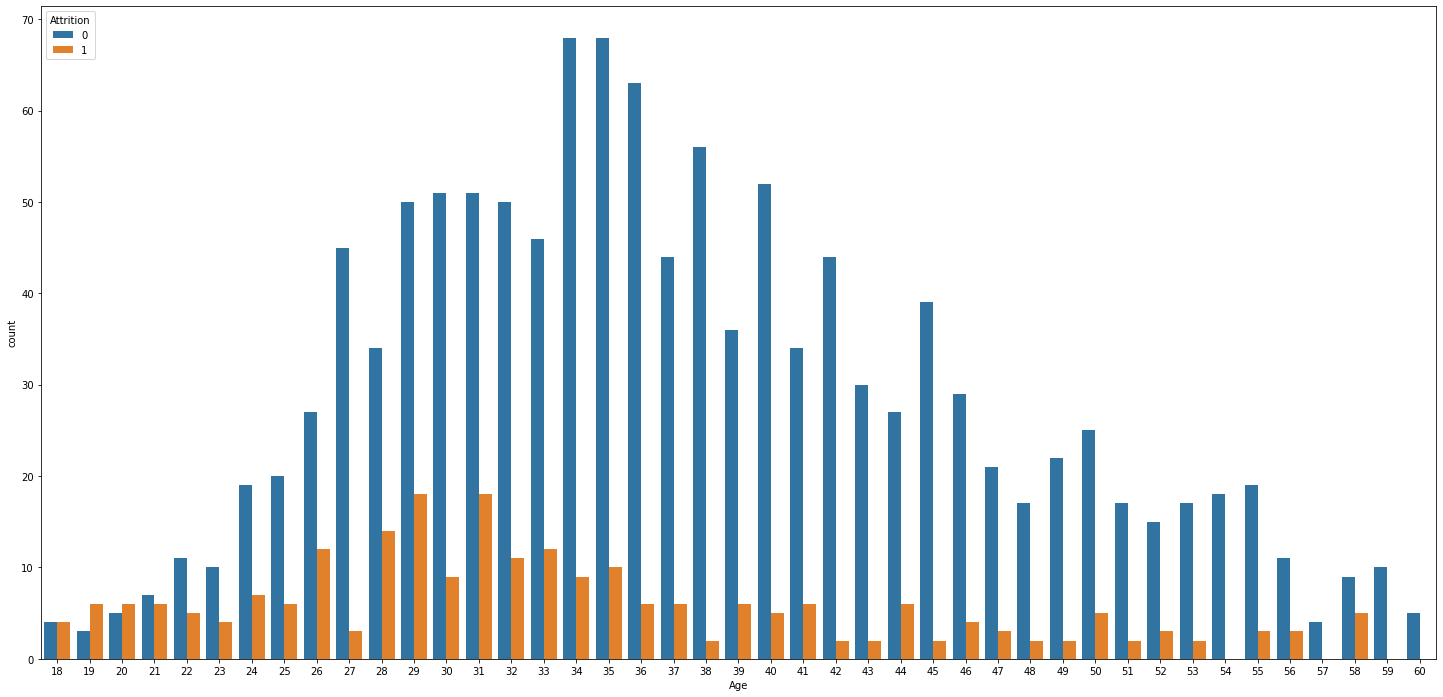

In [82]:
# Checkingage vs attrition
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

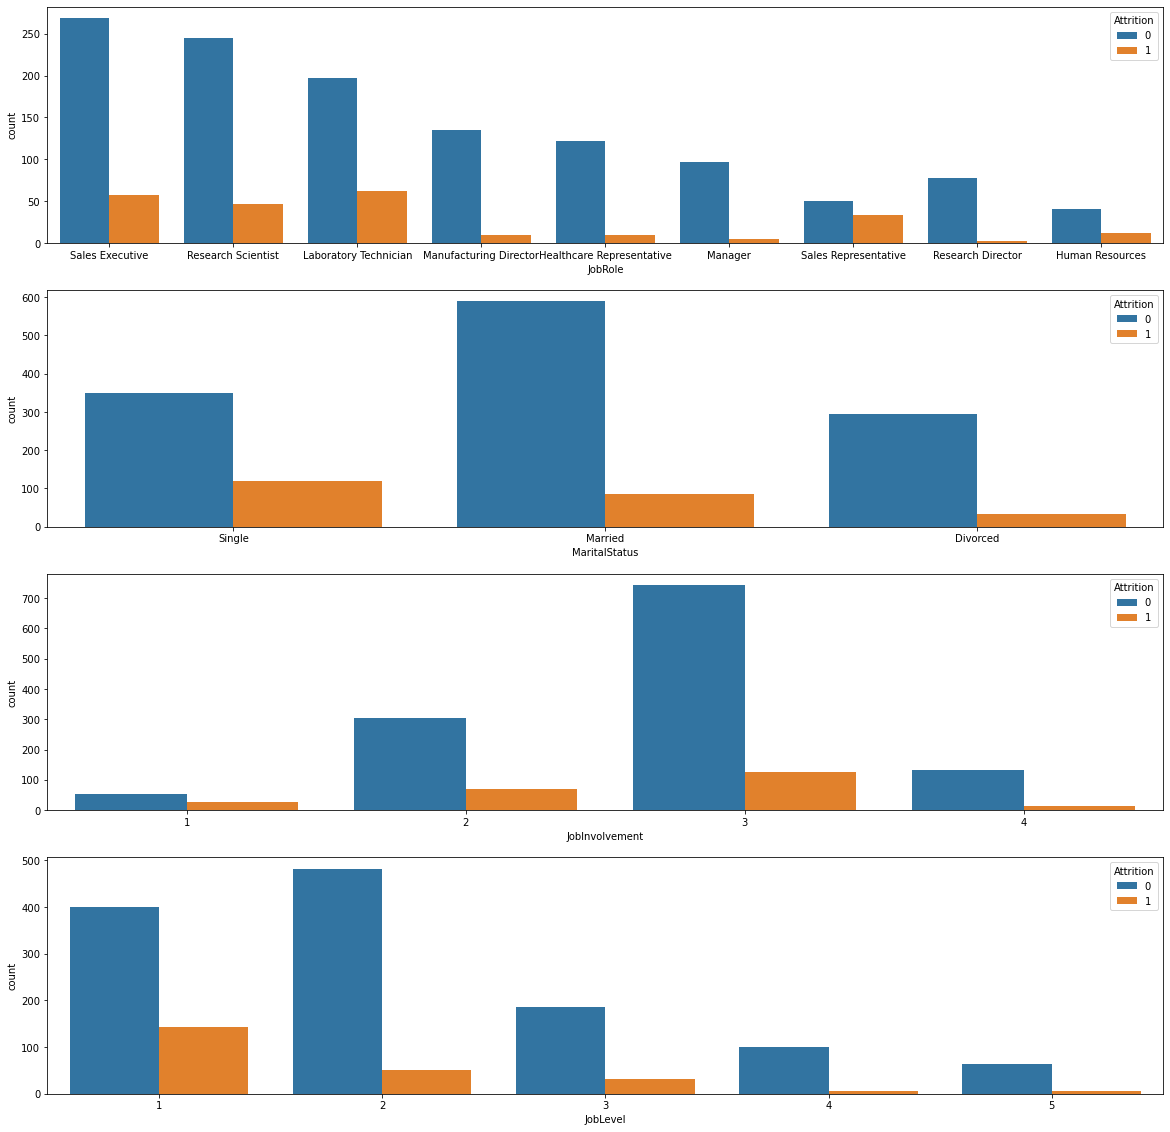

In [83]:
# Checking attrition for JobRole, MaritalStatus, JobInvolvement and JobLevel
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)

Text(0.5, 0, 'Distance From Home')

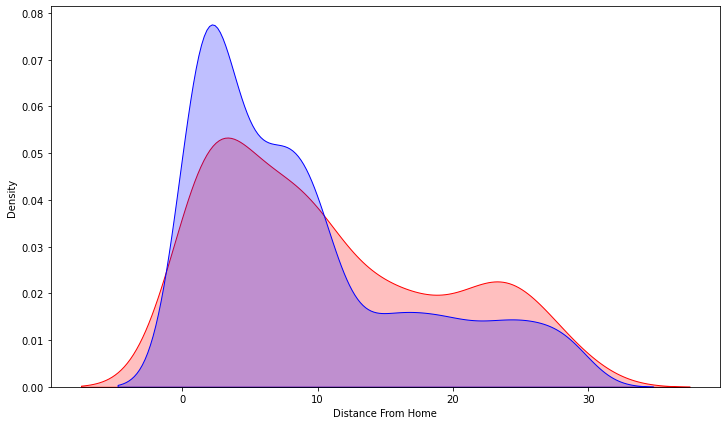

In [84]:

# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(left['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

Text(0.5, 0, 'Years With Current Manager')

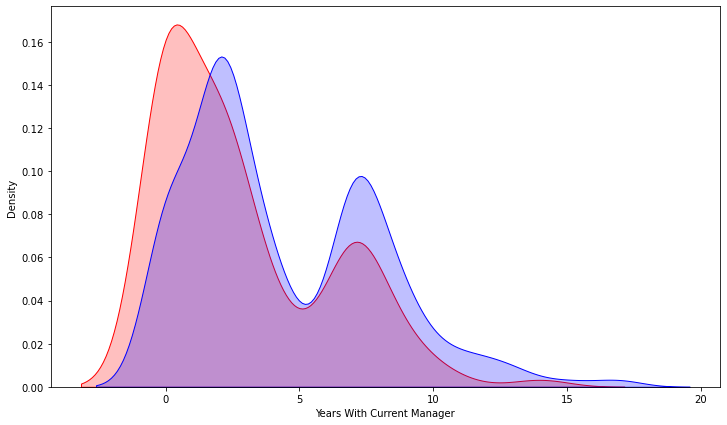

In [85]:
plt.figure(figsize=(12,7))

sns.kdeplot(left['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

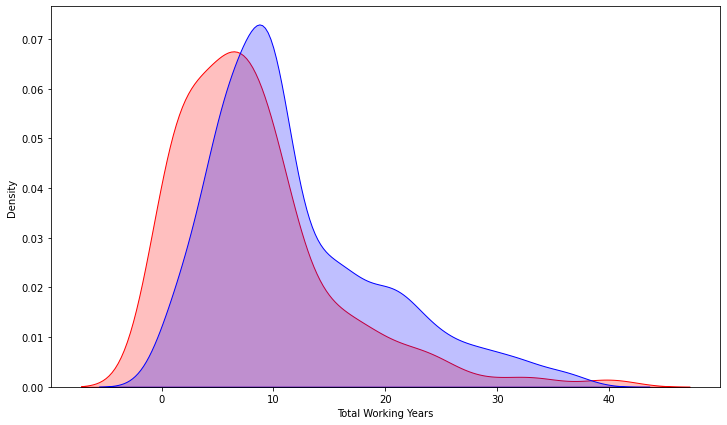

In [87]:
plt.figure(figsize=(12,7))

sns.kdeplot(left['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

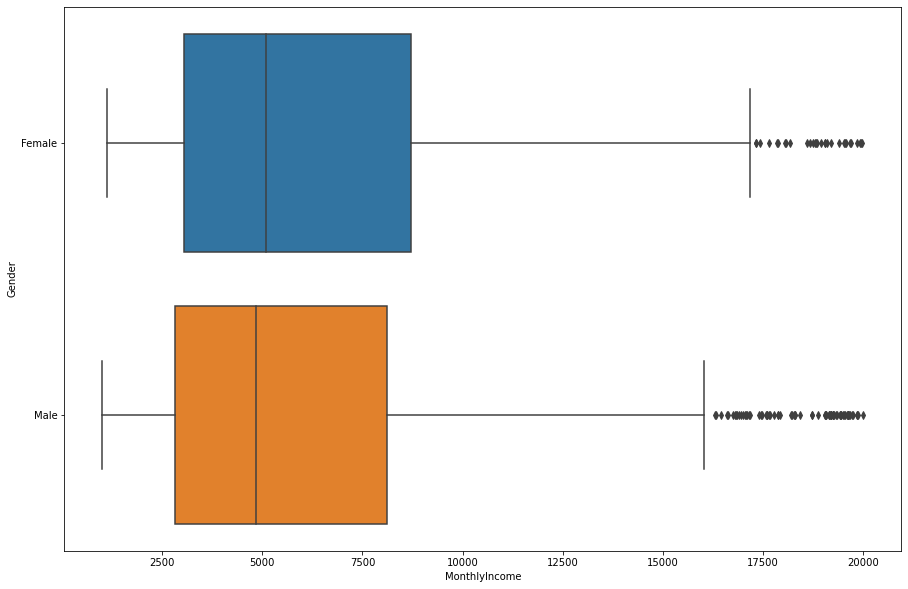

In [88]:
# Let's see the Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

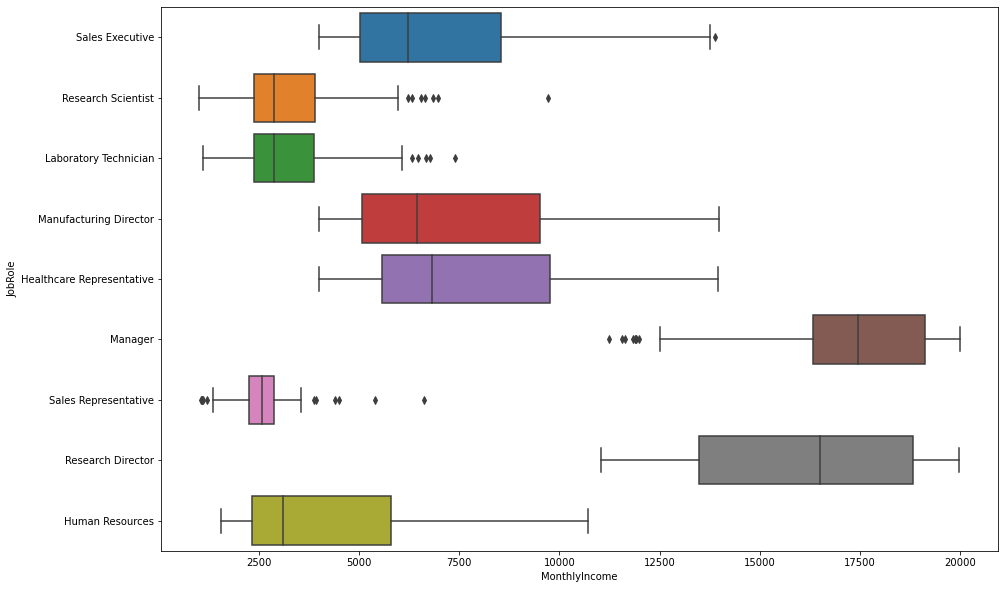

In [89]:
# Boxplot for monthly-income vs job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data)

## Cleaning the data

In [90]:
# Separating categorical variables
categorical = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [92]:
# OneHotEncoding categorical variables
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
categorical = onehotencoder.fit_transform(categorical).toarray()

In [93]:
categorical.shape

(1470, 26)

In [99]:
categorical = pd.DataFrame(categorical)

In [100]:
categorical

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
5     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
6     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
7     0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
8     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
9     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
10    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
11    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
12    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
13    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
14    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
15    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
16    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
17    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
18    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
19    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
20    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
21    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
22    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
23    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
24    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
25    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
26    0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
27    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
28    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
29    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
30    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
31    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
32    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
33    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
34    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
35    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
36    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
37    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
38    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
39    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
40    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
41    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
42    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
43    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
44    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
45    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
46    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
47    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
48    0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
49    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
50    0.0  0.0  1.0  0.0  1.0

In [102]:
# note that we dropped the target 'Atrittion'
numerical = data[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
numerical

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
5      32       1005                 2          2                        4   
6      59       1324                 3          3                        3   
7      30       1358                24          1                        4   
8      38        216                23          3                        4   
9      36       1299                27          3                        3   
10     35        809                16          3                        1   
11     29        153                15          2                        4   
12     31        670                26          1                        1   
13     34       1346                19          2                        2   
14     28        103                24          3                        3   
15     29       1389                21          4                        2   
16     32        334                 5          2                        1   
17     22       1123                16          2                        4   
18     53       1219                 2          4                        1   
19     38        371                 2          3                        4   
20     24        673                11          2                        1   
21     36       1218                 9          4                        3   
22     34        419                 7          4                        1   
23     21        391                15          2                        3   
24     34        699                 6          1                        2   
25     53       1282                 5          3                        3   
26     32       1125                16          1                        2   
27     42        691                 8          4                        3   
28     44        477                 7          4                        1   
29     46        705                 2          4                        2   
30     33        924                 2          3                        3   
31     44       1459                10          4                        4   
32     30        125                 9          2                        4   
33     39        895                 5          3                        4   
34     24        813                 1          3                        2   
35     43       1273                 2          2                        4   
36     50        869                 3          2                        1   
37     35        890                 2          3                        4   
38     36        852                 5          4                        2   
39     33       1141                 1          3                        3   
40     35        464                 4          2                        3   
41     27       1240                 2          4                        4   
42     26       1357                25          3                        1   
43     27        994                 8          3                        4   
44     30        721                 1          2                        3   
45     41       1360                12          3                        2   
46     34       1065                23          4                        2   
47     37        408                19          2                        2   
48     46       1211                 5          4                        1   
49     35       1229                 8          1                        4   
50     48        626        

In [103]:
#combining numerical and categorical variables
data = pd.concat([categorical, numerical], axis = 1)
data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
5     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
6     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
7     0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
8     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
9     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
10    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
11    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
12    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
13    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
14    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
15    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
16    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
17    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
18    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
19    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
20    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
21    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
22    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
23    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
24    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
25    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
26    0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
27    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
28    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
29    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
30    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
31    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
32    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
33    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
34    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
35    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
36    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
37    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
38    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
39    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
40    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
41    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
42    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
43    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
44    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
45    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
46    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
47    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
48    0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
49    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
50    0.0  0.0  1.0  0.0  1.0 

In [108]:
# Scaling the data and separating dependent and independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

In [109]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [116]:
y = data['Attrition']
y

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      1
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      1
51      1
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


## Spliting train and test set

In [117]:
#Splitting train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [118]:
X_train.shape

(1102, 50)

In [119]:
X_test.shape

(368, 50)

## Logistic Regression

In [120]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [121]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 90.21739130434783 %


<AxesSubplot:>

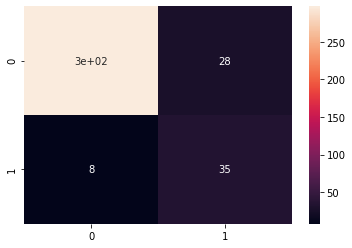

In [123]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       305
           1       0.81      0.56      0.66        63

    accuracy                           0.90       368
   macro avg       0.86      0.76      0.80       368
weighted avg       0.90      0.90      0.89       368



## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
y_pred = model.predict(X_test)

<AxesSubplot:>

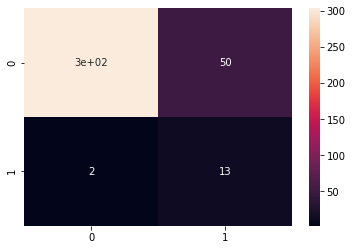

In [127]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       305
           1       0.87      0.21      0.33        63

    accuracy                           0.86       368
   macro avg       0.86      0.60      0.63       368
weighted avg       0.86      0.86      0.82       368



## Artificial Neural Network

In [129]:
import tensorflow as tf

In [131]:
# Creating the layers for our neural network, 3 rectified activation functions and 1 sigmoid activation function for classification
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [132]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [134]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 3s 13ms/step - loss: 0.4513 - accuracy: 0.8058
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3476 - accuracy: 0.8566
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3078 - accuracy: 0.8811
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2882 - accuracy: 0.8884
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2488 - accuracy: 0.9029
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2236 - accuracy: 0.9183
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1823 - accuracy: 0.9310
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.9174
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1332 - accuracy: 0.9456
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0964 - accuracy: 0.9664
Epoch 11

In [135]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [136]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [137]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

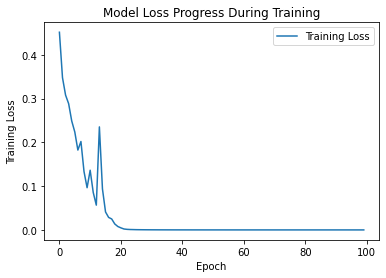

In [138]:
# Plotting training loss
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

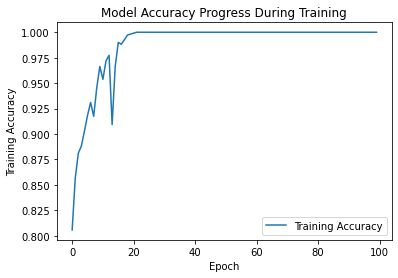

In [139]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<AxesSubplot:>

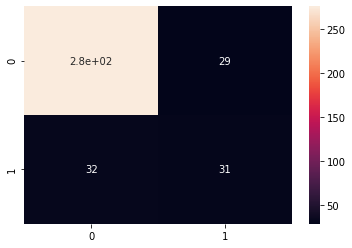

In [140]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       305
           1       0.52      0.49      0.50        63

    accuracy                           0.83       368
   macro avg       0.71      0.70      0.70       368
weighted avg       0.83      0.83      0.83       368

